In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## MAKE A CNN


In [25]:

malta_loc_18 = '../data/Malta-Budget-2018-dataset-v1.csv'
malta_loc_19 = '../data/Malta-Budget-2019-dataset-v1.csv'
malta_loc_20 = '../data/Malta-Budget-2020-dataset-v1.csv'

malta_data_18 = pd.read_csv(malta_loc_18)
malta_data_19 = pd.read_csv(malta_loc_19)
malta_data_20 = pd.read_csv(malta_loc_20)

print(malta_data_18.info())
print(malta_data_19.info())
print(malta_data_20.info())

FileNotFoundError: [Errno 2] No such file or directory: '/../data/Malta-Budget-2018-dataset-v1.csv'

In [4]:
malta_data_19 = malta_data_19.rename(columns={'Off-topic ':'Off-topic'})
combined_data = pd.concat([malta_data_18, malta_data_19, malta_data_20], ignore_index=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Online Post ID          6387 non-null   int64  
 1   Twitter ID              4664 non-null   float64
 2   Related Online Post ID  1177 non-null   float64
 3   Source ID               6387 non-null   object 
 4   Online Post Text        1723 non-null   object 
 5   Subjectivity            6387 non-null   int64  
 6   Sentiment Polarity      6387 non-null   object 
 7   Emotion                 6387 non-null   object 
 8   Sarcasm                 6387 non-null   int64  
 9   Irony                   6387 non-null   int64  
 10  Negation                6387 non-null   int64  
 11  Off-topic               6387 non-null   int64  
 12  Language                6387 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 648.8+ KB


In [5]:
clean_data = combined_data.dropna(subset=['Online Post Text'])
clean_data = clean_data.drop(['Twitter ID', 'Related Online Post ID', 'Source ID','Off-topic'], axis=1)
clean_data = clean_data[clean_data['Language'] == 0]
clean_data = clean_data.drop(['Language'], axis=1)
clean_data = clean_data.rename(columns={'Online Post ID':'ID','Online Post Text':'Text'})
clean_data.head()

,ID,Text,Subjectivity,Sentiment Polarity,Emotion,Sarcasm,Irony,Negation
0,20180001,Great BUDGET . Even cigarettes were not touche...,1,positive,trust,0,0,1
1,20180002,I haven't exactly scanned the budget throughou...,1,negative,disgust,0,0,1
2,20180003,There’s already smoking cessation programs for...,1,neutral,anticipation,0,0,0
3,20180004,So should alcohol and fuel for private vehicle...,1,negative,sadness,0,0,0
4,20180005,Practical? You should say that in a third worl...,1,negative,anger,0,0,1


In [6]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 0 to 5072
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  1114 non-null   int64 
 1   Text                1114 non-null   object
 2   Subjectivity        1114 non-null   int64 
 3   Sentiment Polarity  1114 non-null   object
 4   Emotion             1114 non-null   object
 5   Sarcasm             1114 non-null   int64 
 6   Irony               1114 non-null   int64 
 7   Negation            1114 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 78.3+ KB


In [7]:
clean_data["Emotion"].value_counts()

Emotion
disgust         253
anger           225
anticipation    199
sadness         138
joy              95
surprise         92
trust            67
fear             45
Name: count, dtype: int64

/var/folders/lx/s6mpvqt1305650xxj6d7yfj80000gn/T/ipykernel_7875/1873730629.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


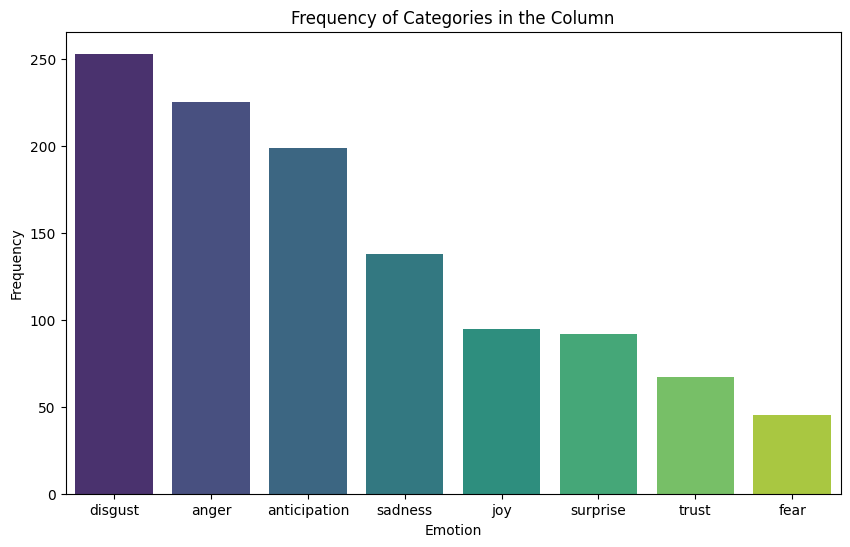

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = clean_data['Emotion'].value_counts()

# Plotting the frequency of string values in the 'Category' column
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in the Column')
plt.show()

In [9]:
import string
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

def remove_special_characters(text):
    pattern = re.compile(r'[^a-zA-Z\s]')
    return pattern.sub('', text)

# Remove URLs and HTML tags
clean_data['Text'] = clean_data['Text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
clean_data['Text'] = clean_data['Text'].str.replace(r'<.*?>', '', regex=True)

# Expand contractions
clean_data['Text'] = clean_data['Text'].apply(lambda x: contractions.fix(x))

# Convert to lowercase
clean_data['Text'] = clean_data['Text'].str.lower()

# Remove punctuation
clean_data['Text'] = clean_data['Text'].str.replace(f"[{string.punctuation}]", " ", regex=True)

# Remove numbers
clean_data['Text'] = clean_data['Text'].str.replace(r'\d+', '', regex=True)

# Remove special characters
clean_data['Text'] = clean_data['Text'].apply(remove_special_characters)

# Remove stop words
stop_words = set(stopwords.words('english'))
clean_data['Text'] = clean_data['Text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Remove extra whitespace
clean_data['Text'] = clean_data['Text'].str.strip()
clean_data['Text'] = clean_data['Text'].str.replace(r'\s+', ' ', regex=True)

# Lemmatize
lemmatizer = WordNetLemmatizer()
clean_data['Text'] = clean_data['Text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

# Tokenize
# clean_data['tokens'] = clean_data['Text'].apply(word_tokenize)
 
clean_data.head()

[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,ID,Text,Subjectivity,Sentiment Polarity,Emotion,Sarcasm,Irony,Negation
0,20180001,great budget even cigarette touched great work...,1,positive,trust,0,0,1
1,20180002,exactly scanned budget throughout earth make i...,1,negative,disgust,0,0,1
2,20180003,already smoking cessation program people want ...,1,neutral,anticipation,0,0,0
3,20180004,alcohol fuel private vehicle raising tax cigar...,1,negative,sadness,0,0,0
4,20180005,practical say third world country supposed eur...,1,negative,anger,0,0,1


In [10]:
stripped_data = clean_data.drop(columns=['Subjectivity','Sentiment Polarity', 'Sarcasm','Irony','Negation'])
stripped_data.head()

,ID,Text,Emotion
0,20180001,great budget even cigarette touched great work...,trust
1,20180002,exactly scanned budget throughout earth make i...,disgust
2,20180003,already smoking cessation program people want ...,anticipation
3,20180004,alcohol fuel private vehicle raising tax cigar...,sadness
4,20180005,practical say third world country supposed eur...,anger


# Multinomial Naive Bayes

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

train_df, test_df = train_test_split(stripped_data, test_size=0.2, stratify=stripped_data['Emotion'], random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['Text'])
X_test = vectorizer.transform(test_df['Text'])

# Labels
y_train = train_df['Emotion']
y_test = test_df['Emotion']

# Training Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.28699551569506726
Classification Report:
               precision    recall  f1-score   support

       anger       0.19      0.31      0.24        45
anticipation       0.43      0.45      0.44        40
     disgust       0.32      0.51      0.39        51
        fear       0.50      0.11      0.18         9
         joy       0.00      0.00      0.00        19
     sadness       0.29      0.18      0.22        28
    surprise       0.00      0.00      0.00        18
       trust       0.00      0.00      0.00        13

    accuracy                           0.29       223
   macro avg       0.22      0.20      0.18       223
weighted avg       0.25      0.29      0.25       223



# CNN

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D, Conv2D
# Tokenization and Padding
max_features = 1000  # Max number of words in tokenizer
max_len = 100  # Max length of each sequence (pad/truncate to this length)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(stripped_data['Text'])
sequences = tokenizer.texts_to_sequences(stripped_data['Text'])
x_data = pad_sequences(sequences, maxlen=max_len)
y_data = pd.get_dummies(stripped_data['Emotion']).values  # Convert categorical labels to one-hot encoded vectors

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=stripped_data['Emotion'], random_state=42)
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)


# CNN Model Architecture
# embedding_dim = 100
# model = Sequential()
# model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))  # Specify input_dim instead of input_length
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(y_data.shape[1], activation='softmax'))  # Output layer with softmax activation for multi-class classification

embedding_dim = 100
model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))  # Specify input_dim instead of input_length
model.add(Conv1D(100, 2, activation='relu'))

# model.add(Dropout(0.2))
model.add(Conv1D(100, 3, activation='relu'))

# model.add(Dropout(0.2))
model.add(Conv1D(100, 4, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_data.shape[1], activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training the model
batch_size = 9
epochs = 11
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of training data: 
(891, 100)
(891, 8)
Shape of test data: 
(223, 100)
(223, 8)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 99, 100)        │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 97, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 94, 100)        │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 47, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 100)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,208 (785.97 KB)

 Trainable params: 201,208 (785.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1973 - loss: 2.0193 - val_accuracy: 0.1883 - val_loss: 1.9469
Epoch 2/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2261 - loss: 1.9359 - val_accuracy: 0.1883 - val_loss: 1.9459
Epoch 3/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2334 - loss: 1.8687 - val_accuracy: 0.2422 - val_loss: 1.9714
Epoch 4/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2676 - loss: 1.7672 - val_accuracy: 0.2377 - val_loss: 2.2410
Epoch 5/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3630 - loss: 1.6259 - val_accuracy: 0.2018 - val_loss: 2.1121
Epoch 6/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4167 - loss: 1.4734 - val_accuracy: 0.1704 - val_loss: 2.6320
Epoch 7/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4935 - loss: 1.2960 - val_accuracy: 0.2197 - val_loss: 3.0587
Epoch 8/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5535 - loss: 1.1198 - val_accuracy: 0.1749 - val_loss:

# CNN with SMOTE (for undistributed data)

In [13]:
from imblearn.over_sampling import SMOTE

# Tokenization and Padding
max_features = 1000  # Max number of words in tokenizer
max_len = 100  # Max length of each sequence (pad/truncate to this length)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(stripped_data['Text'])
sequences = tokenizer.texts_to_sequences(stripped_data['Text'])
x_data = pad_sequences(sequences, maxlen=max_len)
y_data = pd.get_dummies(stripped_data['Emotion']).values  # Convert categorical labels to one-hot encoded vectors

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=stripped_data['Emotion'], random_state=42)
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # CNN Model Architecture
# embedding_dim = 100
# model = Sequential()
# model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_shape=(max_len,)))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# # model.add(Conv1D(64, 3, activation='relu'))
# # model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(y_data.shape[1], activation='softmax'))  # Output layer with softmax activation for multi-class classification

embedding_dim = 100
model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))  # Specify input_dim instead of input_length
model.add(Conv1D(100, 2, activation='relu'))

# model.add(Dropout(0.2))
model.add(Conv1D(100, 3, activation='relu'))

# model.add(Dropout(0.2))
model.add(Conv1D(100, 4, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_data.shape[1], activation='softmax')) 


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training the model
batch_size = 50#30
epochs = 20
model.fit(X_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of training data: 
(891, 100)
(891, 8)
Shape of test data: 
(223, 100)
(223, 8)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 99, 100)        │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 97, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 94, 100)        │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 47, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 23, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 100)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,208 (785.97 KB)

 Trainable params: 201,208 (785.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1020 - loss: 2.0809 - val_accuracy: 0.0583 - val_loss: 2.0841
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1428 - loss: 2.0726 - val_accuracy: 0.0717 - val_loss: 2.0944
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1605 - loss: 2.0505 - val_accuracy: 0.0762 - val_loss: 2.0811
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2280 - loss: 2.0014 - val_accuracy: 0.1390 - val_loss: 2.0440
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2429 - loss: 1.9685 - val_accuracy: 0.0852 - val_loss: 2.2585
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2975 - loss: 1.8112 - val_accuracy: 0.1211 - val_loss: 2.3555
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3960 - loss: 1.6625 - val_accuracy: 0.1525 - val_loss: 2.4390
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5012 - loss: 1.3279 - val_accuracy: 0.1614 - v

# CNN with Word2Vec embedding

In [21]:
from gensim.models import Word2Vec
from sklearn.utils.class_weight import compute_class_weight

# Tokenization and Padding
max_features = 1000  # Max number of words in tokenizer
max_len = 100  # Max length of each sequence (pad/truncate to this length)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(stripped_data['Text'])
sequences = tokenizer.texts_to_sequences(stripped_data['Text'])
x_data = pad_sequences(sequences, maxlen=max_len)
y_data = pd.get_dummies(stripped_data['Emotion']).values  # Convert categorical labels to one-hot encoded vectors

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=stripped_data['Emotion'], random_state=42)
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(stripped_data['Emotion']), y=stripped_data['Emotion'])
class_weights = dict(enumerate(class_weights))

# Train Word2Vec model
texts = stripped_data['Text'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_features, embedding_dim))
word_index = tokenizer.word_index
for word, i in word_index.items():
    if i < max_features:
        try:
            embedding_vector = word2vec_model.wv[word]
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
        except KeyError:
            pass

# Build CNN Model with Word2Vec embeddings
model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False))  # Pre-trained Word2Vec embeddings
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_data.shape[1], activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training the model
batch_size = 32
epochs = 20
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), class_weight=class_weights)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of training data: 
(891, 100)
(891, 8)
Shape of test data: 
(223, 100)
(223, 8)


ValueError: Unrecognized keyword arguments passed to Embedding: {'weights': [array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.67026704e-02,  3.47956680e-02,  1.74327362e-02, ...,
        -5.39933331e-02,  1.25732925e-02,  2.25181482e-03],
       [-3.90023962e-02,  4.38590311e-02,  2.03923937e-02, ...,
        -5.71905747e-02,  4.13837330e-03, -1.15285395e-03],
       ...,
       [-3.74877150e-03,  6.97040791e-03, -5.11697819e-03, ...,
        -1.04774181e-02,  6.77116350e-06,  4.03973740e-03],
       [-1.06169144e-02,  1.28965946e-02,  2.95889354e-03, ...,
        -1.40841762e-02,  1.05024986e-02, -8.59119557e-03],
       [-1.91697315e-03,  1.02447392e-03,  5.80205722e-03, ...,
         4.40036936e-04,  9.73678846e-03, -7.23320642e-04]])]}

# CNN GloVe embedding


In [22]:
# Tokenization and Padding
max_features = 1000  # Max number of words in tokenizer
max_len = 100  # Max length of each sequence (pad/truncate to this length)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(stripped_data['Text'])
sequences = tokenizer.texts_to_sequences(stripped_data['Text'])
x_data = pad_sequences(sequences, maxlen=max_len)
y_data = pd.get_dummies(stripped_data['Emotion']).values  # Convert categorical labels to one-hot encoded vectors

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=stripped_data['Emotion'], random_state=42)
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(stripped_data['Emotion']), y=stripped_data['Emotion'])
class_weights = dict(enumerate(class_weights))

# CNN Model Architecture with Pre-trained Embeddings (GloVe)
embedding_dim = 100

# Load pre-trained GloVe embeddings
embeddings_index = {}
with open('path_to_glove/glove.840B.300d.txt', 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False))  # Pre-trained embeddings
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_data.shape[1], activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training the model
batch_size = 32
epochs = 20
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), class_weight=class_weights)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of training data: 
(891, 100)
(891, 8)
Shape of test data: 
(223, 100)
(223, 8)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_glove/glove.6B.100d.txt'